# Описание данных

**Данные для первой части**
Файл /datasets/hypothesis.csv: 
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

**Данные для второй части**
Файл /datasets/orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

**Описание проекта**

**Контекст**
Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты. 

## Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

**Задача**
1. Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
2. Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
3. Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

#### Загрузка данных и подготовка их к анализу

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from IPython.display import display

import scipy.stats as stats
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

#### Предобработка таблицы hypothesis - гипотезы

In [3]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
pd.options.display.max_colwidth = 150
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Данные целостные, корректные, типы правильные, дубликатов нет - таблица готова к анализу

**Проверяем пропуски**

In [5]:
pd.isnull(hypothesis).sum()

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

Пропусков нет

#### Предобработка таблицы orders - заказы

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Поменяем тип столбца "date" на datetime

In [8]:
orders["date"] = orders["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [10]:
orders["date"].describe()

count                    1197
unique                     31
top       2019-08-05 00:00:00
freq                       48
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [11]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


In [12]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
987,287313500,172218683,2019-08-10,1440,B
1179,339489775,1064078146,2019-08-14,1190,A
382,1794917688,252987601,2019-08-03,2540,A


**Проверим дубликаты**

In [13]:
print("Кол-во дубликатов =",orders.duplicated().sum())

Кол-во дубликатов = 0


**Проверяем пропуски**

In [14]:
pd.isnull(orders).sum()

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Все данные корректны, целостны, дубликатов нет, пропусков нет - готовы к анализу. В процессе предобработки был поменян только тип столбца "date" на datetime

#### Предобработка таблицы visitors - посетители

In [15]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [16]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Поменяем тип столбца "visitors" на datetime

In [17]:
visitors["date"] = visitors["date"].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [18]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [19]:
visitors["date"].describe()

count                      62
unique                     31
top       2019-08-27 00:00:00
freq                        2
first     2019-08-01 00:00:00
last      2019-08-31 00:00:00
Name: date, dtype: object

In [20]:
visitors.describe()

,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [21]:
visitors.sample(3)

,date,group,visitors
36,2019-08-06,B,655
19,2019-08-20,A,575
56,2019-08-26,B,676


**Проверим дубликаты**

In [22]:
print("Кол-во дубликатов =",visitors.duplicated().sum())

Кол-во дубликатов = 0


**Проверяем пропуски**

In [23]:
pd.isnull(visitors).sum()

date        0
group       0
visitors    0
dtype: int64

Все данные корректны, целостны, дубликатов и пропусков нет - и готовы к анализу. В процессе предобработки был поменян только тип столбца "date" на datetime

#### ВЫВОД

Проведена предобработка 3 таблиц. Таблица с гипотезами полностью корректна, здесь ничего не меняли. А в таблицах с заказами и посетителями изменили тип столбца с датой. Диапазон (август 2019) дат в таблицах заказов и посетителей совпадают. Всё готово к анализу

### Приоритизация гипотез
* Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
* Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

In [24]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [25]:
hypothesis['ICE'] = ((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']).round(2)
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [26]:
display(hypothesis[['ICE', 'Hypothesis']].sort_values(by='ICE', ascending=False))

,ICE,Hypothesis
8,16.20,"Запустить акцию, дающую скидку на товар в день рождения"
0,13.33,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
7,11.20,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
6,8.00,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию"
2,7.00,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
1,2.00,"Запустить собственную службу доставки, что сократит срок доставки заказов"
5,1.33,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов"
3,1.12,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар"
4,1.00,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей"


In [27]:
pd.set_option('display.max_colwidth', 500)
hypothesis[['RICE', 'Hypothesis', 'Reach']].sort_values(by='RICE', ascending=False)

,RICE,Hypothesis,Reach
7,112.0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10
2,56.0,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8
0,40.0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3
6,40.0,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5
8,16.2,"Запустить акцию, дающую скидку на товар в день рождения",1
3,9.0,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8
1,4.0,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
5,4.0,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3
4,3.0,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


#### ВЫВОД

Хорошо видно различие в обеих таблицах. Главное меняется тройка лидеров : если в ICE это гипотезы с индексами 8, 0, 7 , то в RICE - 7(была на 3 мете), 2(была на 5), 0(на 2); а лидер таблицы ICE - 8 сместился аж на пятыю позицыию, в то время как 2 перешел на второе место с пятого. Такое отличие продиктовано, тем что в фреймворке RICE мы учитываем важный параметр - Reach (скольких пользователей затронет изменение, которое мы хотим внести), и в гипотезах 7 и 2 он очень высок (в 7 он =10 - максимальный! А в 2 он =8,тоже высокий, а в лидере ICE - в 8 он минимальный =1). Поэтому надо предложить для тестирования гипотезу №7 и возможно еще №2

## Часть 2. Анализ A/B-теста

**Задача**
Проанализируйте A/B-тест:
1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

### Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.

In [28]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
65,2321477056,2868887864,2019-08-16,1710,B
185,716439623,1129369369,2019-08-23,1840,A
267,131747281,2579882178,2019-08-18,19538,B


Рассчитаем усредненную (медианную) выручку за день в каждой группе, чтобы иметь представление сколько выручка за день

In [29]:
orders.groupby(['date','group'])['revenue'].sum().groupby('group').median()

group
A    112473
B    147274
Name: revenue, dtype: int64

In [30]:
visitors.sample(3)

,date,group,visitors
41,2019-08-11,B,721
51,2019-08-21,B,656
26,2019-08-27,A,711


Сравним идентичны ли даты и группы в таблицах посетителей и заказов (на всякий случай,чтобы без проблем производить объединение данных)

In [31]:
orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)


,date,group
0,2019-08-01,A
1,2019-08-01,B
2,2019-08-02,A
3,2019-08-02,B
4,2019-08-03,A
...,...,...
57,2019-08-29,B
58,2019-08-30,A
59,2019-08-30,B
60,2019-08-31,A


In [32]:
compare_dg = orders[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True) == \
                        visitors[['date','group']].drop_duplicates().sort_values(by=['date','group']).reset_index(drop=True)
compare_dg

,date,group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
...,...,...
57,True,True
58,True,True
59,True,True
60,True,True


In [33]:
compare_dg['date'].sum() , compare_dg['group'].sum()

(62, 62)

Все пары дата-группа в таблицах посетители и заказы совпадают, можно объединять без проблем

Создадим таблицу *cumulativeData* куммулятивных данных по обеим таблицам

In [34]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


**Тепрерь построим графики кум. выручки обеих групп**

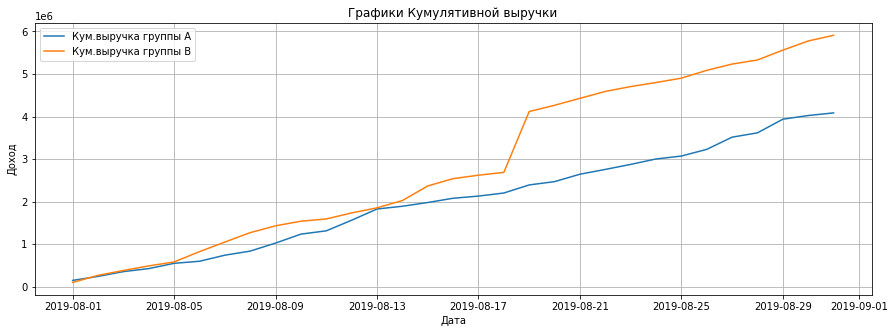

In [35]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.xlabel('Дата') #Подпись для оси х
plt.ylabel('Доход') #Подпись для оси y
plt.title('Графики Кумулятивной выручки')
plt.grid()
plt.legend() ;

В первой половине месяца видно, что выручка в группе "B" растёт чуть быстрее, чем в "A". 13 августа выручки примерно равны. А вторая половина месяца окончательно расставляет всё по местам, - группа "B" однозначно лидер, её выручка значительно больше. Но обязательно надо отметить сильный всплеск выручки в группе "B" 19 августа, скорее всего это были (был) крупные заказы, а без них, по графикам можно предположить, что выручки росли примерно одинаково или же в этот день было очень много заказов.

Посмотрим какие заказы были в районе 19 августа

In [36]:
cumulativeRevenueB.query(' "2019-08-17" <= date <= "2019-08-21" ')

,date,revenue,orders
33,2019-08-17,2620790,373
35,2019-08-18,2686621,382
37,2019-08-19,4116541,403
39,2019-08-20,4263815,423
41,2019-08-21,4426892,437


Кол-во заказов 19 августа на равне с соседними днями

In [37]:
print('Медианное значение одного заказа 19 августа =',orders.query(' date == "2019-08-19" ')['revenue'].median())
orders.query(' date == "2019-08-19" ').sort_values(by='revenue', ascending=False).head(8)

Медианное значение одного заказа 19 августа = 2630.0


,transactionId,visitorId,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
530,3970235543,2912540959,2019-08-19,43990,A
527,1570513684,2837914161,2019-08-19,33405,B
421,3765974140,1357170471,2019-08-19,31680,A
461,2683113224,154576532,2019-08-19,26550,B
525,3031564664,393266494,2019-08-19,21550,A
368,3268879337,2536252163,2019-08-19,20026,B
366,2037051350,1957949546,2019-08-19,16770,A


ак и есть - был один заказ №425 на ~1,3млн в группе "B" 19 августа (в 492 раза больше медианы=2630 за этот день) - этот заказ принес около 30% дневной выручки (1,29 / 4,12); в то время как остальные заказы не больше 44 тысяч . Поскольку этот заказ один, то его в принципе можно считать выбросом и при дальнейшем анализе это надо учитывать.

### Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.

Чтобы построить графики среднего кумулятивного чека по группам — разделим кумулятивную выручку на кумулятивное число заказов:

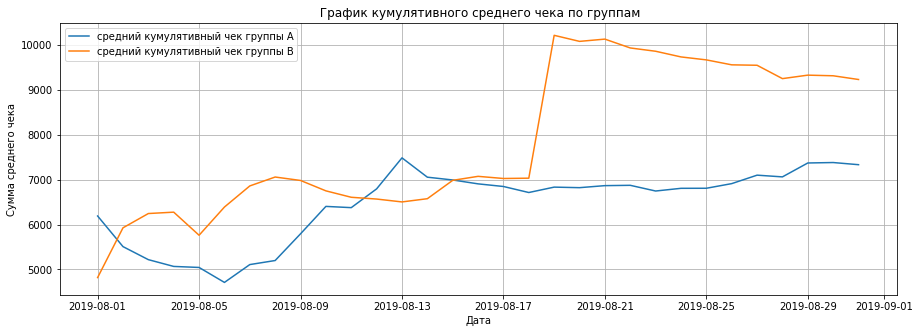

In [38]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.xlabel('Дата') #Подпись для оси х
plt.ylabel('Сумма среднего чека') #Подпись для оси y
plt.title(' График кумулятивного среднего чека по группам')
plt.legend();

Здесь есть некоторая схожесть с графиком кум.выручки. В первой половине в группе "B" чек преимущественно больше, но есть даты где и наоборот - чек больше в "A" - это начало 1 августа и 12-14 августа. Далее чек группы "B" стабильно больше. Но также на графике видно сильное влияние на ср.чек огромного заказа №425, кстати после этого заказа (19 августа) средний чек в "B" постепенно пошел снижаться, в то время как в "A" он с 18 августа ну очень постепенно растет.

### Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.

Cобирем данные в одном датафрейме и потом построим график относительного изменения кумулятивного среднего чека групп

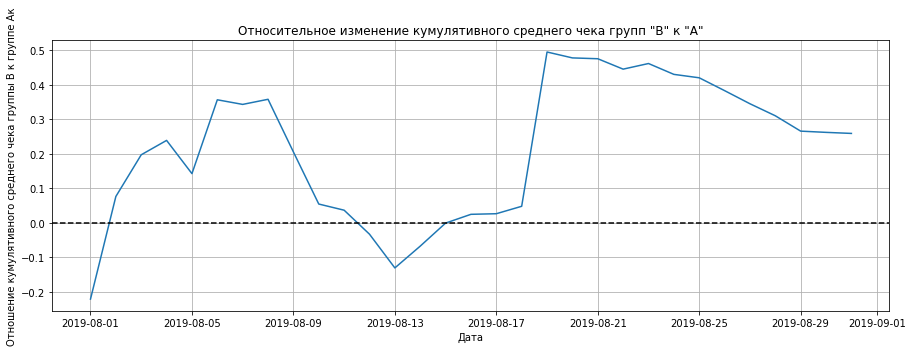

In [39]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительное изменение кумулятивного среднего чека групп "B" к "А"')
plt.xlabel('Дата') #Подпись для оси х
plt.ylabel('Отношение кумулятивного среднего чека группы В к группе Ак') #Подпись для оси y
plt.axhline(y=0, color='black', linestyle='--');

Поскольку этот график является производным от пункта 3.2, то и выводы по большей части аналогичные. Средний чек "B" рос с 1 августа, 2 августа уже превысил "A" и рос до 7 августа. 7-8 пошло обратное движение до 13 августа, причем 3 дня 12-14 акгуста средний чек "A" был больше "B". Но не надолго, с 13 чек "B" опять начал расти и уже 15 августа наступил переломный момент и на следующий день чек "B" оказался больше и находился больше "A" до конца месяца. Опять же здесь хорошо видно, что 19 августа был сильный всплеск (рост) за счет заказа №425 с аномально большим объемом, а в последующие дни средний чек "B" также постепенно снижался.

### Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.

Аналогично проанализируем кумулятивного среднего количества заказов на посетителя по группам:

In [40]:
#cumulativeDataA

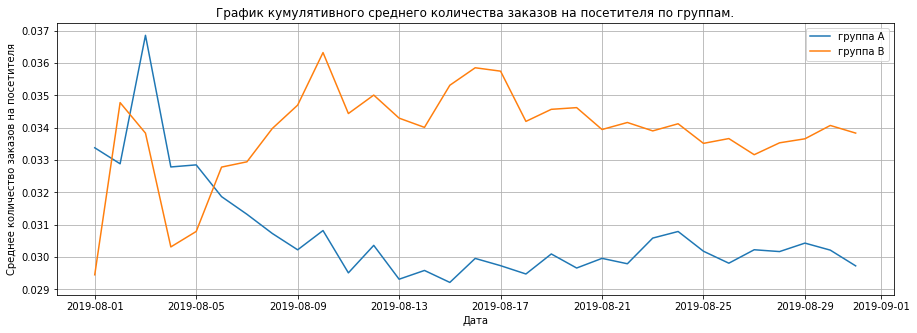

In [41]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='группа A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='группа B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам.')
plt.xlabel('Дата') #Подпись для оси х
plt.ylabel('Среднее количество заказов на посетителя') #Подпись для оси y
plt.legend();

С начала месяца кумулятивное среднее количество заказов на посетителя 1-5 августа группы "A" была значительно больше, даже 3 августа оно была максимальной за весь период наблюдения между группами (исключение 2 августа); и после пика оно пошло сильно падать, а начиная с 9 августа стагнировало на в минимальном диапазоне 0,029-0,031. Кумулятивное среднее количество заказов на посетителя группы "B" с 4 августа пошло расти и уже 6 августа превысило значения группы "A" и росло до 10 августа чуть выше 0,036; затем пошло постепенное снижение, с имевшем место всплеском роста выручки 15-17 августа до чуть ниже 0,036. Можно сделать вывод - выручка группы "B" в целом значительно больше "A" (начиная с 6 августа стабильно показатели "B" больше A"")

### Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.

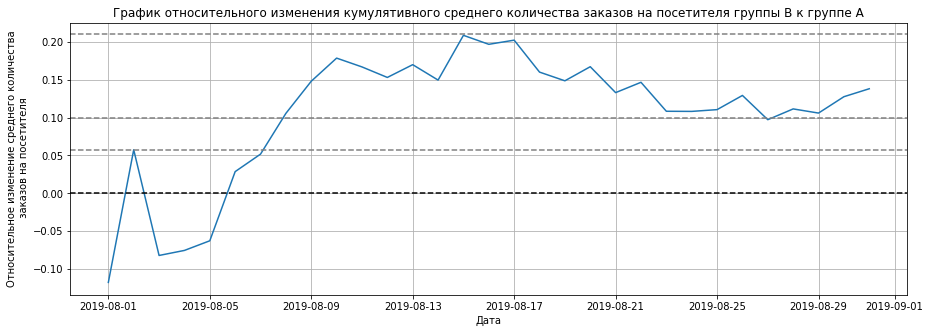

In [42]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.axhline(y=0, color='black', linestyle='--') 
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axhline(y=0.21, color='grey', linestyle='--')
plt.axhline(y=0.057, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение среднего количества\n заказов на посетителя');

По-скольку данный график является производным от пункта 3.4, то и большая часть выводов очень схожа. С 1 авгста по 5 - несколько дней когда конверсия в "A" была больше на 5-10%; но исключение в этот период это 2 августа - был сильный рост конверсии в группе "B" и по итогу дня результат "B" был на 5% больше "A" (надо отметить, что 2 августа был сильный рост конверсий в обоих группах, не иначе как маркетинговая акция была или скидки ...и т.д. - это было видно из в пункте 3.4). Начиная с 6 августа группа "B" лидировала до конца периода; её конверсия росла до 15 августа и разница с "A" на максимуме составила 21%, затем пошло постепенное снижение отностельной конверсии до 10%-14%.

### Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.

In [43]:
orders.sample(3)

,transactionId,visitorId,date,revenue,group
152,3227521980,3938001975,2019-08-01,9980,B
952,3187348360,1596446524,2019-08-28,2070,A
1102,1941707234,199603092,2019-08-12,6438,A


In [44]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


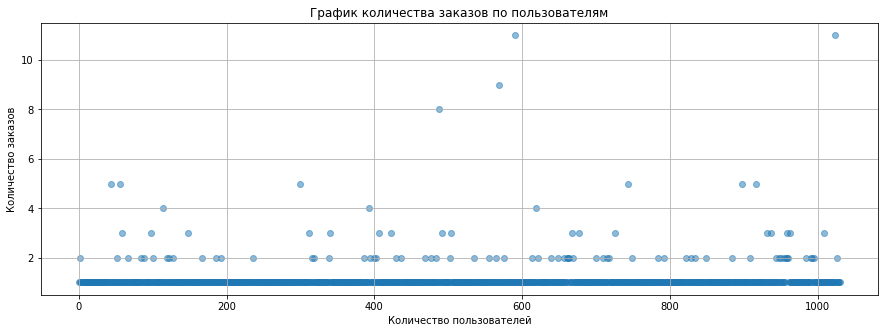

In [45]:
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.title('График количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5);

Больше всего пользователей которые совершили 1 заказ. Тех кто совершили 2 заказа уже не так много. И уже те кто совершил 3 заказа совсем мало, и считать ли это выбросами пока не ясно, - надо посчитать процентили (95 и 99). А все что выше 3 заказов - явно уже аномалия.

### Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.

In [46]:
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [2. 4.]


Для большей точности рассчитаем все процентили с 95 по 99

In [47]:
print('перцентили c 95 по 99 (по заказам) : ', np.percentile(ordersByUsers['orders'], [95,96,97,98, 99])) 

перцентили c 95 по 99 (по заказам) :  [2. 2. 2. 3. 4.]


Теперь видно, что большинство (98%) пользователей делают 1 или 2 заказа. Всё что выше - это аномалия

### Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.

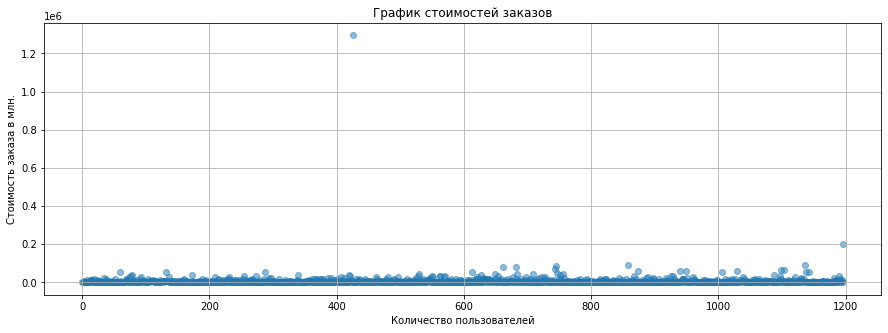

In [48]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа в млн.');

Построим более наглядный график, для это уберем явные выбросы с 'revenue' большим 199000:

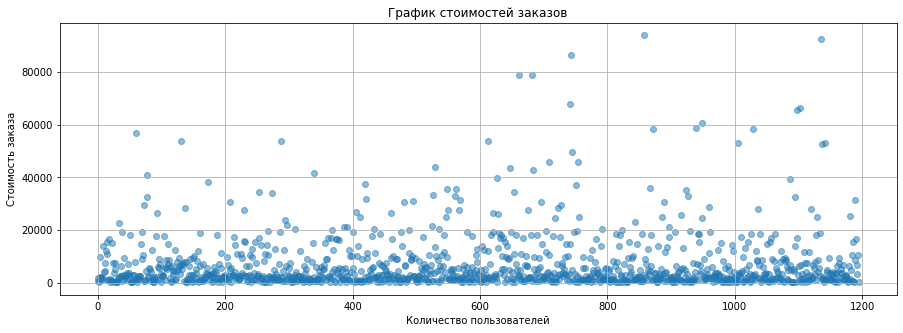

In [49]:
norm_orders = orders[orders['revenue']<=195000]['revenue']
xn_values = pd.Series(range(0,len(norm_orders)))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('График стоимостей заказов')
plt.scatter(xn_values, norm_orders, alpha=0.5)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа');

Хорошо видно тот самый аномальный заказ №425 на 1.3 млн и еще один на ~200 тысяц, остальные примерно не больше 100 тысяч. Чтобы найти более точную границу аномальных заказов рассчитаем процентили.

### Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.

In [50]:
print('Рассчитаем 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по выручке заказов :  [28000.  58233.2]


99% заказов меньше суммы 58233.2 , установим её в качестве границы для аномалий.

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.

Соберем все данные по заказам и визитам (а также добавим кумулятивные показатели) в одну таблицу. Для этого создадим несколько таблиц и затем объединим их:

In [51]:
visitors.head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


In [52]:
orders.head(2)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B


In [53]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

Соединим данные в один фрейм:

In [54]:
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
data.sample(3)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
26,2019-08-27,28,286780,16,147677,495,3514698,548,5232260,711,720,16376,16523
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
29,2019-08-30,11,86460,24,215233,545,4022970,620,5774631,490,490,18037,18198


Посчитаем статистическую значимость различий в среднем числе заказов на пользователя и среднем чеке между группами по «сырым» данным — без удаления аномальных пользователей.

Сформулируем гипотезы.
* Н0: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. 
* Н1: различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

Применим непараметрический крпитерий Уилкоксона-Манна-Уитни и отформатируем p-value, округлив его до трёх знаков после запятой.

In [55]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138


**Вывод**
По «сырым» данным различия в среднем числе заказов групп A и B есть.

Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет, отвергаем. При этом относительный проигрыш группы B равен 13.2% — второе число в выводе.

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.

Чтобы рассчитать статистическую значимость различий в среднем чеке между группами, передадим критерию mannwhitneyu() данные о выручке с заказов (пороговое значение возьмём равное 5%). И найдём относительные различия в среднем чеке между группами.

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [56]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. То есть средние чеки по "сырым" данным схожи. И при этом, средний чек группы B значительно выше среднего чека группы A (на ~26% !).

### Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.

Вспомним - из предыдущих пунктов мы приняли за аномальных пользователей тех, кто совершил 3 и больше заказов или совершил заказ дороже 58233.2 рублей. Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. Узнаем, сколько всего аномальных пользователей методом shape().

In [57]:
usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'], 
     ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId']], 
                                axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 95)]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print("Всего <<ненормальных>> пользователей =" ,len(abnormalUsers)) 
print("Относительные потери = {0:.2%}".format((len(abnormalUsers)/orders['visitorId'].nunique())))

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
Всего <<ненормальных>> пользователей = 74
Относительные потери = 7.18%


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста:

In [58]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 

Применим статистический критерий Манна-Уитни к полученным выборкам,

За нулевую гипотезу возьмём что: "статистически значимых различий в среднем количестве заказов на посетителя нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия в среднем количестве заказов на посетителя есть.

In [59]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

alpha = 0.05
p-value = 0.013
Относительный показатель 'B' и 'A' = 0.173


Вывод: p-value = 0.01 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов нет, - отвергаем. Это значит: и по «очищенным» данным различия в конверсии групп A и B есть. А относительный выигрыш группы "B" над "A" равен 17,4% (выше, чем с «сырыми» данными - 13.8%) .

### Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.

А теперь мосмотрим произошло ли что-нибудь с результатами по среднему чеку?

За нулевую гипотезу возьмём что: "статистически значимых различий в средних чеках между группами нет"; тогда альтернативная гипотеза будет гласить - статистически значимые различия есть.

In [60]:
print("alpha =",0.05)
print("p-value = {0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

alpha = 0.05
p-value = 0.738
Относительный показатель 'B' и 'A' = -0.020


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия,тоже нет (как и с "Сырыми" данными). А вот средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A, в то время как по "сырым" данным, он был больше аж на ~26%, - и всё это из-за одного того самого аномального заказа №425 на 1,3 млн !

### Примите решение по результатам теста и объясните его.

**По результатам тестирования было выявлено:**

- Оказалось, что и по "сырым" и по "очищенным" данным различия в средних чеках групп A и B отстутствуют, несмотря на то, что средний чек группы B оказался незначительно (на 2%) ниже среднего чека группы A по "очищенным" данным, в то время как по "сырым" данным, он был больше аж на ~26%, - и всё это из-за одного того самого аномального заказа №425 на 1,3 млн ! Всё логично аномальный заказ убрали и чеки сравнялись ( метод A/B тестирования не обманешь выбросами
- Выборка данных имеет корректный размер, проблему подглядывания в результате сравнения групп во время проведения теста мы исключили! Кумулятивные метрики по выручке, среднему чеку и среднем количестве заказов на поситителя почти все время лидировали в группе B. У нас на некоторое время возникли сомнения из-за резких колебаний на графике кумулятивного среднего чека в группе B до очистки данных от аномальных пользователей. Наши сомнения подтвердились на этот счет, т.к. после очистки разница между средними чеками стала минимальна, но это не даёт нам повода сомневаться в проведении теста и его результатах. 
- До и после очистки данных, показатель среднего количества заказов на посетителя в группе B больше показателя в группе A - сначала на 14% до и на 17% после очистки данных. 

**Данная разница показателей среднего количества заказов на посетителя между группами и до и после очистки данных является СТАТИСТИЧЕСКИ ЗНАЧИМОЙ, что пользволяет нам сделать вывод о том, что мы можем остановить наш A/B тест и зафиксировать победу группы B!**